<a href="http://www.datascience-paris-saclay.fr">
<img src="img/logoUPSayPlusCDS_990.png" width="600px">
</a>

# PLAsTiCC - RAMP: classification of astronomical transients

##### Alexandre Boucaud (Paris-Saclay Center for Data Science) 
##### Emille E. O. Ishida (Universite Clermont-Auvergne)

## Introduction


Most of the sources we observe in the night sky evolve during a very long period of time (millions or even billions of years) - rendering them practically static in comparison to the time scale of  a human life. However, this is only a partial description of possible events taking place in the Universe. 

For a long time, astronomers have [recorded the observation](https://en.wikipedia.org/wiki/SN_185) events whose life spam lasts for days or months.  More  recently, the advent of modern telescopes expanded our ability to detect astronomical events which happen from a few seconds to years. These are called **[transients](https://www.lsst.org/science/transient-optical-sky)** and they are the may concern of researchers working in **time domain astronomy**.



Transients can are the observational consequence of a large variety of astronomical phenomena. For example,  a cataclismic event (e.g. a stellar explosion in the case of [supernovae](https://www.nasa.gov/audience/forstudents/5-8/features/nasa-knows/what-is-a-supernova.html)); the physical process governing high density regions of the Universe (e.g. [active galactic nuclei (AGN)](https://ned.ipac.caltech.edu/level5/Cambridge/frames.html)) or our position in relation to a set of observed objects (e.g. [eclipsing binaries](http://www.physics.sfasu.edu/astro/ebstar/ebstar.html)). 


These relatively rapid changing objects can provide important clues about themselves and their environement - as well as the evolution of the universe as a whole (e.g. [type Ia supernovae](http://hubblesite.org/hubble_discoveries/dark_energy/de-type_ia_supernovae.php) provided the first evidence of the current accelerated expansion of the Universe caused by [dark energy](http://astronomy.swin.edu.au/cosmos/D/Dark+Energy)). Therefore, the proper classification of transients is a crucial task in observational astronomy - specially in the light of large data volumes expected for the next generation of astronomical surveys.


In what follows, we will use the example of supernovae to illustrate the more general problem of transient classification. 

## The Data Problem


Once a supernova is detected, we need to scrutinize its  light through two different channels before we can use it in subsequent astrophysical analysis. These two methods are called *spectroscopy* and *photometry*. 

**[Spectroscopy](http://loke.as.arizona.edu/~ckulesa/camp/spectroscopy_intro.html)**  is the modern equivalent of using a prism to separate a beam of white light in the rainbown colours. It is a high resolution measurement which allows us to identify emission/absorption features indicative of specific chemical elements - and are also the main source of information enabling classification. 

Despite being paramount for the classification task, spectroscopy is an extremely time consuming process - with integration times hanging from 20 minutes to a few hours depending on the telescope and brightness of the source. 


Traditionally, transient classification is completely based on spectroscopic measurements - however, given the volume of data expected from the upcoming large scale sky surveys, this strategy is not sustainable. An alternative approach, based on cheaper/lower resolution measurements must be found.

<figure>
    <img src="img/SNspectra.jpg" width="400px">
    <figcaption>**Figure 1**: Example of spectra of SNe Ia, Ic, Ib and II (from top to bottom) highlighting their main spectral features. 
        *Figure by Daniel Kasen*
    </figcaption>
</figure>


**Photometry**  gives the overall information of how bright the source is (how much energy the object is emitting) at a particular moment. It can be described as the low resolution counterpart of spectroscopy - or the integral of all the information stored in the spectra. 


A sequence of photometric observations made at different moments in time is called a *light curve*. It holds the information of how the energy of the source evolves with time and can also be used to characterize different types of supernovae (although the distinction between classes is much more discrete than we would hope it to be). 


Photometry has the advantadge of being a relatevely straight forward and cheap process. Moreover, it is also capable of accessing a much larger volume of the universe - reaching dimmer and, consequently, further objects.

<figure>
    <img src="img/lightcurves.jpg" width="500px">
    <figcaption>**Figure 2**: Example of the light-curves (brightness as a function of time) for different supernova types. *Image: J. Craig Wheeler, 2012*
    </figcaption>
</figure>

New instruments, like the [Large Synoptic Survey Telescope (LSST)](https://www.lsst.org/) - scheduled to begin observations in 2022 - will produce an unprecedented number of light curves. Once these transients are detected, we rely on agreements with other telescopes in order to acquire a small number of spectroscopic observations. 


In summary: we must develop ways to classify transients using only their light curves. 


In the context of machine learning, this means using the small, biased spectroscopic sample in order to train a classifier which will subsequently be applied to the larger, photometric-only sample.

### Filters


In a real data scenario, the concetual description of a light curve given above has a further degree of complexity. 

The electromagnetic spectrum is divided in broad wavelength ranges and the signal from the source is integrate only within this range - and convolved with the filter transmission.

The figure bellow shown an example of a set of broad-band filters superimposed to a type Ia supernova spectra.

<figure>
    <img src="img/filters_snIa_max_z1.png" width="700px">
    <figcaption>**Figure 3**: Example of DES broad-band filters transmission superimposed to a type Ia supernova spectrum at peak brightness. *Figure by Emille Ishida*
    </figcaption>
</figure>

As a consequence, for each supernova we will have a set of 4 light curves. These express the evolution of the brightness of the object as a function of time *for each one of the wavelength intervals covered by the broad-band filters*.

## The prediction task

For this specific challenge we wil focus on the binary classification of supernovae, between SNIa and non-SNIa.

### The Road so Far


The photometric classification of supernovae has been studied in the astronomical literature for a long time. This culminated in the *Supernova Photometric Classification Challenge (SNPCC)* ([Kessler *et al.*, 2010](https://arxiv.org/pdf/1008.1024.pdf)), where the participants were invited to classify a simulated dataset designed to mimic the specifications of the *[Dark Energy Survey](https://www.darkenergysurvey.org/)*. 


The challenge provided a state of the art description of the classification methods available in the literature, bringing together different groups who had been investigating the problem for a while. Although none of the algorithms performed obviously better than all others, its main legacy was the updated data set and corresponding labels which were made public to the community. 


This is the data set that we will use in this RAMP.  

### References

A recent review of how different machine learning methods perform on this dataset can be found at [Lochner *et al.*, 2016](https://arxiv.org/abs/1603.00882) and references therein.

##  Data



The lightcurve data is made of **non-homogeneously sampled**, **non-periodic** time series with correlated errors obtained in several wavelength filters.

The DES dataset provided with this RAMP has light curves in 4 filters *g*, *r*, *i* and *z*.

### Downloading data

To obtain the DES dataset, make sure to run the provided script `download_data.py`

In [ ]:
!python download_data.py

### Reading the data

Here we provide methods to read the `pickle` files and convert the data to a `pandas` dataframe for convenience.

The SN label is removed from the main dataframe and provided as a separate one.

In [1]:
import gzip
import pickle
import pandas as pd
import numpy as np


def read_data(filename):
    """Read data from pickled file to a pandas dataframe"""
    with gzip.open(filename, 'rb') as f:
        data = pickle.load(f)

    X = to_dataframe(data)
    y = pd.get_dummies(X.type == 0, prefix='SNIa', drop_first=True)
    X = X.drop(columns=['comment', 'type'])

    return X, y


def to_dataframe(data):
    """Converts from a python dictionary to a pandas dataframe"""
    for idx in data:
        sn = data[idx]
        for filt in 'griz':
            sn['mjd_%s' % filt] = np.array(sn[filt]['mjd'])
            sn['fluxcal_%s' % filt] = np.array(sn[filt]['fluxcal'])
            sn['fluxcalerr_%s' % filt] = np.array(sn[filt]['fluxcalerr'])
            del sn[filt]
        sn.update(sn['header'])
        del sn['header']

    return pd.DataFrame.from_dict(data, orient='index')

Here is a peak at the data.

In [2]:
X, y = read_data('data/des_train.pkl')

In [3]:
# 5 first rows of the dataframe
X.head()

,mjd_g,fluxcal_g,fluxcalerr_g,mjd_r,fluxcal_r,fluxcalerr_r,mjd_i,fluxcal_i,fluxcalerr_i,mjd_z,fluxcal_z,fluxcalerr_z,snid,z,pkmjd,pkmag_g,pkmag_r,pkmag_i,pkmag_z
1186,"[56283.203, 56288.199, 56292.098, 56304.051, 5...","[3.182, -13.07, -7.177, -0.4645, 0.2906, 16.63...","[6.285, 11.79, 11.65, 2.479, 7.569, 6.195, 3.6...","[56283.211, 56288.215, 56292.102, 56304.055, 5...","[-4.973, -6.427, 9.861, -1.663, 6.724, 23.82, ...","[3.326, 6.181, 4.83, 1.657, 2.966, 2.553, 3.07...","[56283.215, 56289.109, 56292.191, 56304.07, 56...","[-0.615, -9.294, 0.8371, 0.6895, -1.593, 24.51...","[5.816, 7.082, 5.599, 2.506, 5.021, 3.699, 4.5...","[56283.223, 56289.125, 56292.199, 56304.086, 5...","[11.06, 9.393, 3.887, -0.519, 7.005, 33.13, 94...","[5.047, 5.425, 5.158, 3.934, 5.43, 4.443, 7.02...",1186,0.3698,56335.335938,23.07,22.27,22.21,22.43
1292,"[56177.172, 56179.172, 56187.156, 56189.148, 5...","[27.18, 34.83, 24.15, 34.06, 20.13, 5.124, 2.7...","[4.837, 2.372, 1.805, 9.802, 3.809, 2.291, 1.5...","[56177.188, 56179.312, 56187.172, 56189.16, 56...","[33.02, 34.65, 26.92, 33.84, 18.57, 17.39, 17....","[5.375, 3.109, 1.365, 3.938, 2.385, 1.643, 1.1...","[56177.203, 56179.328, 56187.188, 56189.176, 5...","[49.55, 42.79, 30.72, 34.43, 23.86, 14.07, 12....","[5.519, 4.282, 1.993, 8.104, 8.079, 2.161, 1.4...","[56177.234, 56179.359, 56187.211, 56189.203, 5...","[49.68, 48.62, 42.8, 43.68, 33.21, 27.07, 21.5...","[4.784, 3.636, 2.322, 4.765, 5.671, 2.26, 1.86...",1292,0.3501,56164.195312,23.44,23.36,23.35,23.12
2542,"[56176.191, 56179.188, 56180.266, 56188.16, 56...","[6.955, 21.06, 24.68, 31.91, 27.69, 22.4, 13.2...","[4.773, 2.635, 2.617, 5.746, 2.38, 2.698, 4.80...","[56176.199, 56179.195, 56180.281, 56188.176, 5...","[38.23, 49.79, 54.4, 86.6, 80.42, 73.66, 56.32...","[2.257, 1.963, 1.675, 5.829, 3.629, 2.059, 2.5...","[56176.215, 56179.234, 56180.297, 56188.211, 5...","[36.53, 48.08, 55.75, 70.12, 78.81, 71.36, 68....","[3.225, 2.191, 3.837, 4.723, 9.182, 2.675, 4.3...","[56176.238, 56179.266, 56180.328, 56188.238, 5...","[29.16, 46.65, 45.53, 64.54, 77.19, 75.92, 62....","[2.545, 3.832, 4.569, 3.611, 3.302, 2.779, 2.9...",2542,0.5415,56192.007812,24.17,22.79,22.81,22.85
2598,"[56248.324, 56258.215, 56261.098, 56273.16, 56...","[1.006, -4.694, -2.976, -1.77, 19.69, 61.47, 6...","[1.701, 4.948, 8.828, 1.752, 2.131, 5.026, 6.6...","[56248.34, 56258.227, 56261.102, 56273.176, 56...","[-3.556, -3.604, -5.289, 1.965, 22.99, 84.78, ...","[1.337, 2.382, 3.395, 1.214, 1.358, 2.664, 3.3...","[56258.035, 56261.125, 56273.188, 56281.203, 5...","[22.24, 3.958, -0.1393, 23.06, 90.29, 93.4, 12...","[9.893, 3.854, 2.023, 1.858, 3.509, 5.387, 3.5...","[56258.066, 56261.156, 56273.219, 56281.227, 5...","[4.218, 1.312, 0.01804, 25.39, 87.45, 116.4, 1...","[3.968, 3.086, 2.251, 2.342, 3.062, 3.001, 3.2...",2598,0.3513,56301.996094,22.46,22.02,21.94,22.21
3644,"[56177.172, 56179.172, 56187.156, 56189.148, 5...","[10.03, 3.29, 25.31, 52.93, 137.8, 113.8, 66.4...","[4.792, 2.242, 1.817, 9.857, 4.69, 3.219, 2.12...","[56177.188, 56179.312, 56187.172, 56189.16, 56...","[3.537, 10.17, 45.56, 59.92, 111.3, 139.9, 124...","[5.336, 3.038, 1.537, 4.06, 3.17, 3.089, 2.598...","[56177.203, 56179.328, 56187.188, 56189.176, 5...","[-2.231, 3.372, 28.65, 42.03, 151.9, 155.9, 14...","[5.436, 4.201, 1.98, 8.119, 8.558, 3.634, 3.05...","[56177.234, 56179.359, 56187.211, 56189.203, 5...","[-0.1238, -3.598, 15.7, 14.39, 136.5, 142.2, 1...","[4.691, 3.518, 2.197, 4.702, 6.187, 3.451, 2.9...",3644,0.2705,56204.546875,22.18,22.13,22.00,22.15


And the labels, converted to a {0, 1} array.

In [4]:
y.head()

,SNIa_True
1186,1
1292,0
2542,1
2598,1
3644,0


In the DataFrame, each supernova is indexed by its ID

In [5]:
X.head().index

Int64Index([1186, 1292, 2542, 2598, 3644], dtype='int64')

and can be accessed via the `loc` accessor

In [6]:
# SN 1186
X.loc[1186]

mjd_g           [56283.203, 56288.199, 56292.098, 56304.051, 5...
fluxcal_g       [3.182, -13.07, -7.177, -0.4645, 0.2906, 16.63...
fluxcalerr_g    [6.285, 11.79, 11.65, 2.479, 7.569, 6.195, 3.6...
mjd_r           [56283.211, 56288.215, 56292.102, 56304.055, 5...
fluxcal_r       [-4.973, -6.427, 9.861, -1.663, 6.724, 23.82, ...
fluxcalerr_r    [3.326, 6.181, 4.83, 1.657, 2.966, 2.553, 3.07...
mjd_i           [56283.215, 56289.109, 56292.191, 56304.07, 56...
fluxcal_i       [-0.615, -9.294, 0.8371, 0.6895, -1.593, 24.51...
fluxcalerr_i    [5.816, 7.082, 5.599, 2.506, 5.021, 3.699, 4.5...
mjd_z           [56283.223, 56289.125, 56292.199, 56304.086, 5...
fluxcal_z       [11.06, 9.393, 3.887, -0.519, 7.005, 33.13, 94...
fluxcalerr_z    [5.047, 5.425, 5.158, 3.934, 5.43, 4.443, 7.02...
snid                                                         1186
z                                                          0.3698
pkmjd                                                     56335.3
pkmag_g   

or via positional indexing with the `iloc` accessor.

In [7]:
# Also SN 1186
sn0 = X.iloc[0]

Here is a method to visualize the data

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

DES_FILTERS = 'griz'

def plot_lightcurves(idx):
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 8))
    for id_f, f in enumerate(DES_FILTERS):
        ax = axes[id_f // 2, id_f % 2]
        ax.errorbar(X.iloc[idx]['mjd_%s' % f], 
                    X.iloc[idx]['fluxcal_%s' % f], 
                    X.iloc[idx]['fluxcalerr_%s' % f], 
                    fmt='o')
        ax.set_xlabel('MJD')
        ax.set_ylabel('Calibrated flux')
        ax.set_title('%s-band' % f)

Use this method to look at the raw light curves

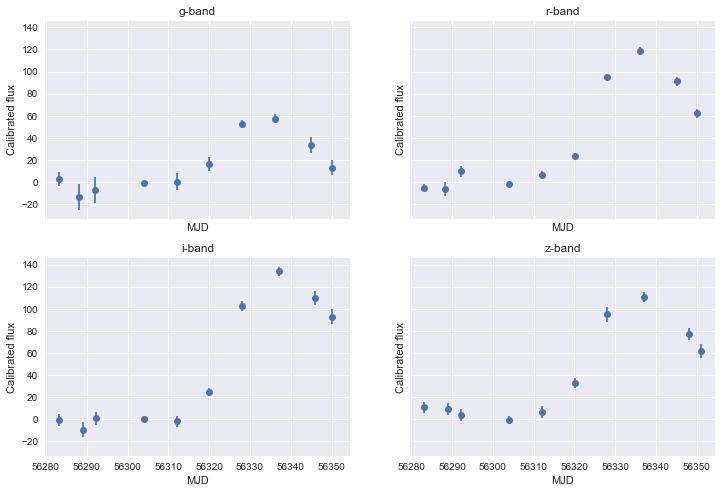

In [9]:
plot_lightcurves(0)

## Starting kit pipeline elements

For this classification challenge, participants are required to submit two files:
* `feature_extractor.py` 
* `classifier.py`     

In the following, we will go through the process of designing a baseline submission, that is writing the script for both the pre-processing step and the classification step.

### Pre-processing - a.k.a. feature extraction

As the SN data is highly non-homogeneous a little pre-processing need to be done. In the example below we fit the data using a parametric function proposed by [Bazin et al., 2009](https://arxiv.org/pdf/0904.1066.pdf):

$$ f(t) = A \frac{\exp\left(-\frac{t - t_0}{\tau_{fall}}\right)}{1 + \exp\left(\frac{t - t_0}{\tau_{rise}}\right)}  + B$$

In [10]:
def bazin(time, A, B, t0, tfall, trise):
    X = np.exp(-(time - t0) / tfall) / (1 + np.exp((time - t0) / trise))
    return A * X + B

Although this parametric form does not have a physical motivation, it reproduces quiet well the behavior of most light curves.  

<div class="alert alert-warning">
<b>NOTE</b>  
This function is very sensitive to the magnitude of the time of observation. The use of [Modified Julian Date](https://bowie.gsfc.nasa.gov/time/) creates large time values, which are not relevant for such analysis so we use a scaled time instead in order to ensure the convergence of the fit.
</div>


We provide an example fitting function, so you can fit a light curve and plot reslts as follows:

In [11]:
from scipy.optimize import least_squares

def lightcurve_fit(time, flux):
    scaled_time = time - time.min()
    t0 = scaled_time[flux.argmax()]
    guess = (0, 0, t0, 40, -5)

    errfunc = lambda params: abs(flux - bazin(scaled_time, *params))

    result = least_squares(errfunc, guess, method='lm')

    return result.x

The parametric fit on the light curves yields 5 parameters for each filter $A, B, t_0, \tau_{fall}, \tau_{rise}$.

In [12]:
lightcurve_fit(sn0.mjd_g, sn0.fluxcal_g)

array([132.37309428,  -5.38585536,  47.36812147,  10.92992313,  -3.95247409])

In [13]:
def plot_lightcurves_with_fit(idx):
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 8))
    for id_f, f in enumerate(DES_FILTERS):
        ax = axes[id_f // 2, id_f % 2]
        
        time = X.iloc[idx]['mjd_%s' % f]
        flux = X.iloc[idx]['fluxcal_%s' % f]
        
        fit = lightcurve_fit(time, flux)
        stime = np.arange(time.min(), time.max())
        
        ax.plot(time, flux, 'o')
        ax.plot(stime, bazin(stime - stime.min(), *fit))
        ax.set_xlabel('MJD')
        ax.set_ylabel('Calibrated flux')
        ax.set_title('%s-band' % f)

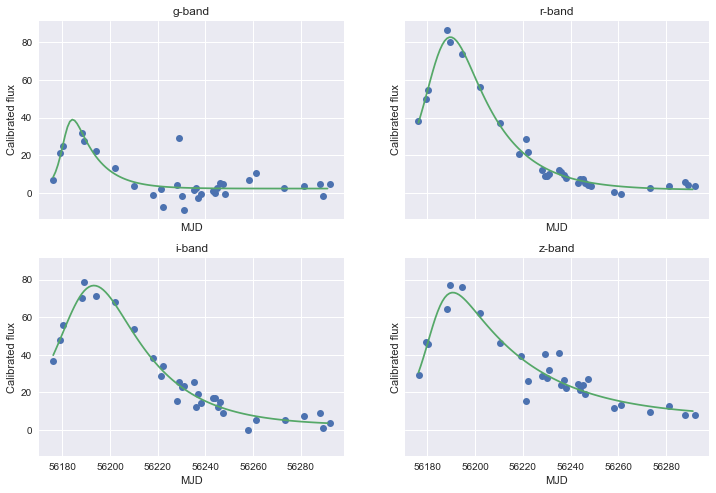

In [14]:
plot_lightcurves_with_fit(2)

### Constructing the data matrix for classification

Now that you can fit each individual light curve, you are ready to build your low dimension representation of the data.  


In this example, each entry in the data matrix will correspond to one object and each column to a best-fit parameters. As we have 4 filters, we will concatenate the 20 best-fit results for different filters in the same row of the data matrix.  

In [15]:
def preprocessing(data):
    # Create palceholder for output matrix
    full_params = np.zeros((len(data), 5 * len(DES_FILTERS)))
    # Iterate over supernovae
    for idx, snid in enumerate(data.index):
        params = np.zeros((len(DES_FILTERS), 5))
        # Iterate over filters
        for id_f, f in enumerate(DES_FILTERS):
            time = data.loc[snid, 'mjd_%s' % f]
            flux = data.loc[snid, 'fluxcal_%s' % f]
            try:
                params[id_f] = lightcurve_fit(time, flux)
            except ValueError:
                # If fit does not converge leave zeros
                continue
        full_params[idx] = params.ravel()
                           
    return full_params

### `feature_extractor.py`

The submitted `feature_extractor.py` is expected to define part of the `FeatureExtractor` class, namely the `transform` method that will process the raw data `X`.

Given the methods defined in the section above, the class would boil down to

In [ ]:
# feature_extractor.py

class FeatureExtractor():
    def __init__(self):
        pass

    def fit(self, X_df, y):
        pass

    def transform(self, X_df):
        return preprocessing(X_df)

However it will need to have all the methods above implemented with the right imports **within the file**.

Checkout the baseline submission for a working example:

In [ ]:
%load submissions/starting_kit/feature_extractor.py

## Classification

We can now use the feature matrix to train a classifier of our choosing. This is the second expected contribution to the challenge.

### `classifier.py`

As for the `feature_extractor.py`, the `classifier.py` needs a `Classifier` class with `__init__()`, `fit()` and `predict_proba()` methods to be implemented.

Since this is not the main focus of the challenge, we chose a very simple implementation for the baseline, that is a random forest classifier. The starting_kit example looks like

In [ ]:
# classifier.py

from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier


class Classifier(BaseEstimator):
    def __init__(self):
        self.clf = RandomForestClassifier()

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)

This classifier will take the output of the `FeatureExtractor.transform()` and train using the `y` labels from the beginning.

Once trained, the RAMP pipeline will automatically then test the `Classifier` predictions against the expected labels, following scores/metrics defined in the `problem.py`.

## Local testing

To test locally that the pipeline works, the RAMP workflow provides a command line tool: `ramp_test_submission`.

For relatively big datasets (e.g. the DES target set has 20 000 + entries), a smaller portion of the data is also delivered:
* `des_train_mini.pkl`
* `des_test_mini.pkl`
so that the local testing is only a few minutes long.

To train/test on this minimalist dataset, use the `--quick-test` keyword.

In [16]:
!ramp_test_submission --quick-test

Testing PLAsTiCC transient classification RAMP
Reading train and test files from ./data ...
Reading cv ...
Training ./submissions/starting_kit ...
CV fold 0
	score   auc   acc   nll
	train  1.00  1.00  0.10
	valid  0.83  0.73  1.01
	test   0.83  0.69  0.82
CV fold 1
	score   auc   acc   nll
	train  1.00  0.99  0.12
	valid  0.89  0.77  0.40
	test   0.77  0.65  0.66
CV fold 2
	score   auc   acc   nll
	train  1.00  0.98  0.12
	valid  0.82  0.73  1.06
	test   0.72  0.61  1.97
----------------------------
Mean CV scores
----------------------------
	score           auc           acc           nll
	train     1.0 ± 0.0  0.99 ± 0.005   0.11 ± 0.01
	valid  0.85 ± 0.033  0.74 ± 0.016  0.82 ± 0.299
	test   0.77 ± 0.045  0.65 ± 0.033  1.15 ± 0.583
----------------------------
Bagged scores
----------------------------
	score   auc
	valid  0.85
	test   0.81


### Writing your own submissions locally

To start working on a new submission, the easiest way is to copy the starting_kit into a new directory and then modify the files from the notebook using the `%%file` magic command.

In [ ]:
!cp -r submissions/starting_kit submissions/first_submission

In [ ]:
%%file submissions/first_submission/feature_extractor.py

class FeatureExtractor():
    def __init__(self):
        pass

    def fit(self, X_df, y):
        pass

    def transform(self, X_df):
        return preprocessing(X_df)

In [ ]:
%file submissions/first_submission/classifier.py

from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier


class Classifier(BaseEstimator):
    def __init__(self):
        self.clf = RandomForestClassifier()

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)

Finally, test your new submission by providing the name of the submission

In [ ]:
!ramp_test_submission --submission=first_submission --quick-test

<footer style="float:right; color:#999;background:#fff;">
HAPPY CODING...
</footer>

---

In [17]:
from IPython.display import HTML
HTML(open("style/custom.css").read())